In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/FCALC')
import fcalc

Mounted at /content/drive


In [46]:
df=pd.read_csv("/content/drive/MyDrive/in+vehicle+coupon+recommendation/in-vehicle-coupon-recommendation.csv")

***About Dataset***

Source:

Tong Wang, tong-wang '@' uiowa.edu, University of Iowa
Cynthia Rudin, cynthia '@' cs.duke.edu, Duke University

Data Set Information:

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

Attribute Information:

1.destination: No Urgent Place, Home, Work

2.passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

3.weather: Sunny, Rainy, Snowy

4.temperature:55, 80, 30

5.time: 2PM, 10AM, 6PM, 7AM, 10PM

6.coupon: Restaurant (lesser 20) , Coffee House, Carry out & Take away, Bar, Restaurant(20-50)

7.expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

8.gender: Female, Male

9.age: 21, 46, 26, 31, 41, 50plus, 36, below21

10.maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed

11.has_Children:1, 0

12.education: Some college - no degree, Bachelors degree, Associates degree, High
School Graduate, Graduate degree (Masters or Doctorate), Some High School

13.occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry

14.income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
$50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500

15.Bar: never, less1, 1-3, gt8, nan4-8 (feature meaning: how many times do you go to a bar every month?)

16.CoffeeHouse: never, less1, 4-8, 1-3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)

17.CarryAway:n4-8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)

18.RestaurantLessThan20: 4-8, 1-3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

19.Restaurant20To50: 1-3, less1, never, gt8, 4-8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)

20.toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)

21.toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)

22.direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

23.direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

**Class Label**

***Y:1, 0 (whether the coupon is accepted)***

In [47]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [48]:
df.shape

(12684, 26)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [50]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [51]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title="EDA Report")
profile

In [52]:
round((df[['car','CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar']].isnull().sum()*100/len(df)),2)

car                     99.15
CoffeeHouse              1.71
Restaurant20To50         1.49
CarryAway                1.19
RestaurantLessThan20     1.02
Bar                      0.84
dtype: float64

In [53]:
droped_column = ['car','toCoupon_GEQ5min','direction_same','direction_opp']
df = df.drop(columns = droped_column)

In [54]:
round((df[['CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar']].isnull().sum()*100/len(df)),2)

CoffeeHouse             1.71
Restaurant20To50        1.49
CarryAway               1.19
RestaurantLessThan20    1.02
Bar                     0.84
dtype: float64

In [13]:
val_counts_weather = df['weather'].value_counts()

val_counts_weather_with_y = df.groupby(['weather','Y']).size().reset_index(name="counts")


px.pie(names = val_counts_weather.index, values = val_counts_weather, title = 'Weather Frequency', width = 800, height = 600)

In [55]:
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df.describe()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,...,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.754100,0.672895,0.316935,63.301798,2.069615,1.639940,0.440949,0.486676,2.915169,1.341848,...,7.680227,3.847130,1.077893,1.644197,1.095002,1.116919,1.093031,0.561495,0.119126,0.568433
std,0.827275,0.941975,0.661861,19.154486,1.300099,1.301404,0.496520,0.499842,2.137671,0.844149,...,6.320758,2.480907,1.227206,1.353922,1.092668,1.017842,1.038570,0.496224,0.323950,0.495314
min,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,80.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,7.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,80.000000,3.000000,3.000000,1.000000,1.000000,5.000000,2.000000,...,12.000000,6.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,2.000000,3.000000,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,7.000000,4.000000,...,24.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int64
 1   passanger             12684 non-null  int64
 2   weather               12684 non-null  int64
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int64
 5   coupon                12684 non-null  int64
 6   expiration            12684 non-null  int64
 7   gender                12684 non-null  int64
 8   age                   12684 non-null  int64
 9   maritalStatus         12684 non-null  int64
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int64
 12  occupation            12684 non-null  int64
 13  income                12684 non-null  int64
 14  Bar                   12684 non-null  int64
 15  CoffeeHouse           12684 non-null  int64
 16  Carr

In [ ]:
X = df.drop(columns='Y')
y = df['Y']
y= [x==1 for x in y]
y=pd.DataFrame(y,columns=['Y'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.6261166579085654


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

       False       0.58      0.50      0.54      1644
        True       0.66      0.72      0.69      2162

    accuracy                           0.63      3806
   macro avg       0.62      0.61      0.61      3806
weighted avg       0.62      0.63      0.62      3806



In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.6960063058328955


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

       False       0.71      0.50      0.59      1644
        True       0.69      0.84      0.76      2162

    accuracy                           0.70      3806
   macro avg       0.70      0.67      0.67      3806
weighted avg       0.70      0.70      0.69      3806



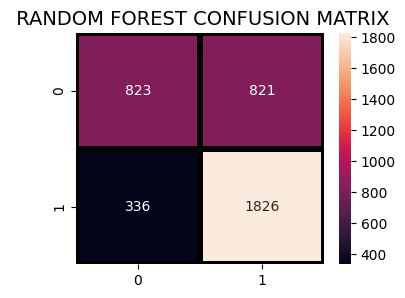

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

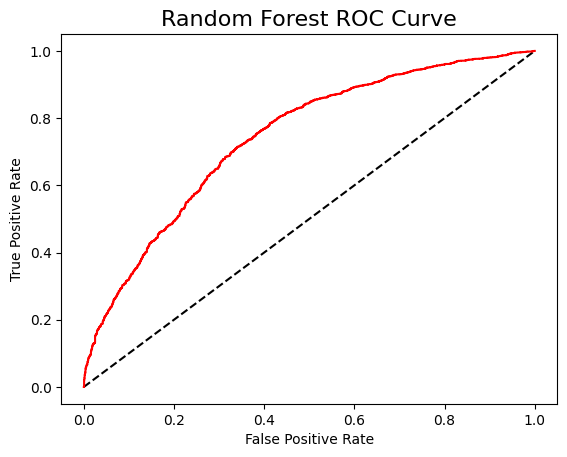

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.6232264844981608


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

       False       0.58      0.47      0.52      1644
        True       0.65      0.74      0.69      2162

    accuracy                           0.62      3806
   macro avg       0.61      0.61      0.60      3806
weighted avg       0.62      0.62      0.62      3806



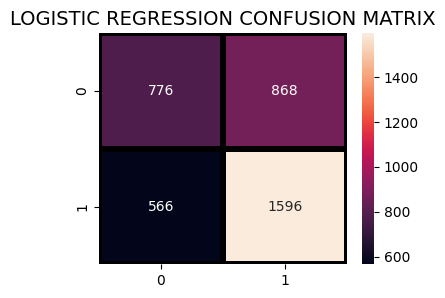

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

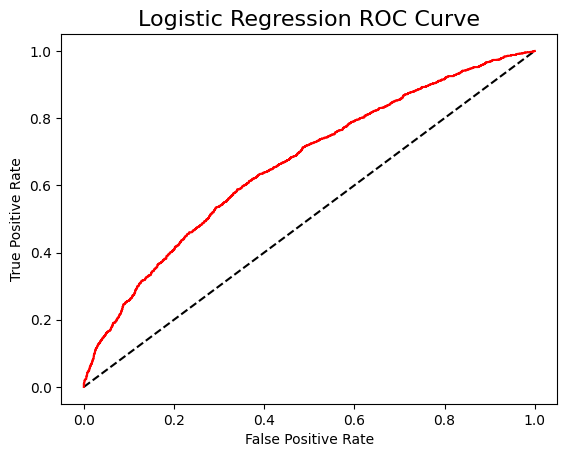

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)


Decision Tree accuracy is : 0.686022070415134


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

       False       0.63      0.66      0.64      1644
        True       0.73      0.71      0.72      2162

    accuracy                           0.69      3806
   macro avg       0.68      0.68      0.68      3806
weighted avg       0.69      0.69      0.69      3806



In [ ]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model_XG.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.12%


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

       False       0.71      0.50      0.59      1644
        True       0.69      0.84      0.76      2162

    accuracy                           0.70      3806
   macro avg       0.70      0.67      0.67      3806
weighted avg       0.70      0.70      0.69      3806



In [ ]:
NB = GaussianNB()


In [ ]:
NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
NB.score(X_train,y_train)

0.6208605541788691

In [ ]:
YNB_pre = NB.predict(X_test)


In [ ]:
print(classification_report(y_test,YNB_pre))


              precision    recall  f1-score   support

       False       0.56      0.43      0.49      1644
        True       0.63      0.75      0.68      2162

    accuracy                           0.61      3806
   macro avg       0.60      0.59      0.59      3806
weighted avg       0.60      0.61      0.60      3806



In [ ]:
scores_KNN = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_KNN)
print('Mean Accuracy:', scores_KNN.mean())


Cross-Validation Scores: [0.61465721 0.55319149 0.5500394  0.47754137 0.46687697 0.49132492
 0.53391167 0.55835962 0.58675079 0.59542587]
Mean Accuracy: 0.5428079314296511


In [ ]:
scores_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_rf)
print('Mean Accuracy:', scores_rf.mean())


Cross-Validation Scores: [0.66824271 0.67769898 0.66824271 0.65169425 0.64905363 0.68927445
 0.65851735 0.67507886 0.70425868 0.7137224 ]
Mean Accuracy: 0.6755784007378074


In [ ]:
scores_lr = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_lr)
print('Mean Accuracy:', scores_lr.mean())


Cross-Validation Scores: [0.59889677 0.63750985 0.62962963 0.62805359 0.62381703 0.6340694
 0.58596215 0.63170347 0.64511041 0.6522082 ]
Mean Accuracy: 0.6266960496975934


In [ ]:
scores_dt = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_dt)
print('Mean Accuracy:', scores_dt.mean())


Cross-Validation Scores: [0.63120567 0.59968479 0.62174941 0.61150512 0.59148265 0.5670347
 0.55914826 0.62223975 0.59700315 0.5851735 ]
Mean Accuracy: 0.5986227014987334


In [ ]:
scores_NB = cross_val_score(NB, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_NB)
print('Mean Accuracy:', scores_NB.mean())

Cross-Validation Scores: [0.60756501 0.6036249  0.61229314 0.60520095 0.60488959 0.63170347
 0.58044164 0.63328076 0.65063091 0.60883281]
Mean Accuracy: 0.6138463182962813


In [ ]:
scores_xg = cross_val_score(model_XG, X, y, cv=10, scoring='accuracy')
print('Cross-Validation Scores:', scores_xg)
print('Mean Accuracy:', scores_xg.mean())



Cross-Validation Scores: [0.67454689 0.67060678 0.65799842 0.63041765 0.59542587 0.58832808
 0.59305994 0.6466877  0.68375394 0.67113565]
Mean Accuracy: 0.6411960907145147


In [57]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
Y                        2
dtype: int64

In [58]:

df['occupation'] = pd.qcut( df['occupation'],q=5,labels=['1', '2', '3', '4','5'])


In [59]:
X = df.drop(columns='Y')
X=pd.get_dummies(X)
X=X.astype('bool')
y = [x==1 for x in df['Y']]# taking the max class as true, which is Dermason
y=pd.Series(y)
X=X.iloc[10000:11000,:]
y=y.iloc[10000:11000]
y.value_counts()

True     550
False    450
dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")

In [62]:
bin_cls.predict(X_test.values)

In [63]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype('bool')))

0.31666666666666665
0.696132596685083


In [64]:
predicted_y=bin_cls.predictions
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.65      0.46      0.54       139
         1.0       0.82      0.19      0.31       161

    accuracy                           0.32       300
   macro avg       0.49      0.22      0.28       300
weighted avg       0.74      0.32      0.42       300



In [65]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [66]:
scores_bin1 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin1)
print('Mean Accuracy:', pd.Series(scores_bin1).mean())

Cross-Validation Scores: [0.34, 0.33, 0.32666666666666666, 0.3333333333333333, 0.33666666666666667, 0.3466666666666667, 0.35, 0.37, 0.32, 0.34]
Mean Accuracy: 0.3393333333333333


In [67]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")

In [68]:
bin_cls.predict(X_test.values)

In [69]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

0.3233333333333333
0.701657458563536


In [70]:
predicted_y=bin_cls.predictions
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.66      0.47      0.55       139
         1.0       0.84      0.20      0.32       161

    accuracy                           0.32       300
   macro avg       0.50      0.22      0.29       300
weighted avg       0.76      0.32      0.43       300



In [71]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [72]:
scores_bin1 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin1)
print('Mean Accuracy:', pd.Series(scores_bin1).mean())

Cross-Validation Scores: [0.34, 0.33, 0.32666666666666666, 0.3333333333333333, 0.33666666666666667, 0.3466666666666667, 0.35, 0.37, 0.32, 0.34]
Mean Accuracy: 0.3393333333333333


In [73]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="ratio-support ")

In [74]:
bin_cls.predict(X_test.values)

In [75]:
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions.astype(bool)))

0.4633333333333333
0.0


In [76]:
predicted_y=bin_cls.predictions
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

       False       0.46      1.00      0.63       139
        True       0.00      0.00      0.00       161

    accuracy                           0.46       300
   macro avg       0.23      0.50      0.32       300
weighted avg       0.21      0.46      0.29       300



In [77]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard-support")  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        bin_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, bin_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [78]:
scores_bin2 = my_cross_val(bin_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin2)
print('Mean Accuracy:', pd.Series(scores_bin2).mean())

Cross-Validation Scores: [0.34, 0.33, 0.3233333333333333, 0.32666666666666666, 0.3433333333333333, 0.3466666666666667, 0.35, 0.37, 0.32, 0.33666666666666667]
Mean Accuracy: 0.33866666666666656


In [79]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())

In [80]:
pat_cls.predict(X_test.values)

In [81]:
print(accuracy_score(y_test, pat_cls.predictions))
print(f1_score(y_test, pat_cls.predictions.astype('bool')))

0.6566666666666666
0.696969696969697


In [82]:
predicted_y=pat_cls.predictions
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.65      0.61      0.63       139
         1.0       0.70      0.70      0.70       161

    accuracy                           0.66       300
   macro avg       0.45      0.44      0.44       300
weighted avg       0.68      0.66      0.67       300



In [83]:
def my_cross_val(model, X, y, n_splits=5):
    # Convert to numpy arrays if input is pandas DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    num_samples = len(X)
    fold_size = num_samples // n_splits
    scores = []

    for i in range(n_splits):
        # Define the indices for the current fold
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else num_samples

        # Create the training and validation sets
        val_idx = list(range(start, end))
        train_idx = [idx for idx in range(num_samples) if idx not in val_idx]

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        y_train=pd.Series(y_train)
        X_train=pd.DataFrame(X_train)
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy())  # Replace with your model's training method

        # Predict on validation set
        #X_test=pd.DataFrame(X_test)
        pat_cls.predict(X_test.values)

        # Calculate accuracy or any other metric of interest
        accuracy = accuracy_score(y_test, pat_cls.predictions)  # Replace with your own metric

        scores.append(accuracy)

    return scores


In [85]:
scores_bin4 = my_cross_val(pat_cls, X, y,10)
print('Cross-Validation Scores:', scores_bin4)
print('Mean Accuracy:', pd.Series(scores_bin4).mean())

Cross-Validation Scores: [0.8433333333333334, 0.8533333333333334, 0.84, 0.8533333333333334, 0.8566666666666667, 0.87, 0.84, 0.8433333333333334, 0.84, 0.8266666666666667]
Mean Accuracy: 0.8466666666666667
